# PS07: Predictive modeling, validation
## Name: Kaylee Cho
### Date: 2023/05/25

### 1. Prepare data

In [448]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(1)

In [449]:
heart_data = pd.read_csv("../datasets/heart.csv.bz2", sep=",")
heart_data.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [450]:
heart_data.shape

(303, 14)

(2) Is there any missing values? What is the data types? What are ranges of numeric variables, and possible values of categorical variables? What is the percentage of heart attack among these patients?

In [451]:
heart_data.isna().sum()
# there are no missing values in the dataset!

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [452]:
heart_data.dtypes
# data types are mostly int! oldpeak is float!

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [453]:
print("minimum of each variables")
print(heart_data.min())
print("maximum of each variables")
print(heart_data.max())
# most of the range for the variable column do fit the documentation on the description!

minimum of each variables
age          29.0
sex           0.0
cp            0.0
trtbps       94.0
chol        126.0
fbs           0.0
restecg       0.0
thalachh     71.0
exng          0.0
oldpeak       0.0
slp           0.0
caa           0.0
thall         0.0
output        0.0
dtype: float64
maximum of each variables
age          77.0
sex           1.0
cp            3.0
trtbps      200.0
chol        564.0
fbs           1.0
restecg       2.0
thalachh    202.0
exng          1.0
oldpeak       6.2
slp           2.0
caa           4.0
thall         3.0
output        1.0
dtype: float64


In [454]:
# percentage of heartattack among these patients
(heart_data.output.sum()/heart_data.output.count()) * 100

54.45544554455446

(3) Which variables above are inherently non numeric (nominal or ordinal?)

sex[nominal]: This is a binary categorical variable which indicates whether the patient is female or male. (Male = 1; Female = 0) \
cp[ordinal]: This is ordinal categorical variable which indicates chest pain type with the number of 1 through 4. \
fbs[nominal]: This is a binary categorical variable which distinguishes patients' fasting blood sugar level of more than 120mg/dl or less. (1 = ture; 0 = false) \
restecg[ordinal]: This is ordinal categorical variable that shows resting electrocardiographic results. \
exng[nominal]: It's binary categorical variable indicating exercie induceed angina. \
caa[ordinal]: It's ordinal categorical variable indicating number of major vessels from range of 0 to 3.

(4) change nominal variabels to categorical so that you can use them for sklearn! Construct the outcome vector y and the design matrix X! How many columns do you have?

In [455]:
heart_data.sex = heart_data.sex.astype("category")
heart_data.fbs = heart_data.fbs.astype("category")
heart_data.exng = heart_data.exng.astype("category")
X = heart_data.drop("output", axis = 1)
X = pd.get_dummies(X, columns = ['sex', 'fbs', 'exng'])
y = heart_data.output
X
# I have 16 columns!

,age,cp,trtbps,chol,restecg,thalachh,oldpeak,slp,caa,thall,sex_0,sex_1,fbs_0,fbs_1,exng_0,exng_1
0,63,3,145,233,0,150,2.3,0,0,1,0,1,0,1,1,0
1,37,2,130,250,1,187,3.5,0,0,2,0,1,1,0,1,0
2,41,1,130,204,0,172,1.4,2,0,2,1,0,1,0,1,0
3,56,1,120,236,1,178,0.8,2,0,2,0,1,1,0,1,0
4,57,0,120,354,1,163,0.6,2,0,2,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,1,123,0.2,1,0,3,1,0,1,0,0,1
299,45,3,110,264,1,132,1.2,1,0,3,0,1,1,0,1,0
300,68,0,144,193,1,141,3.4,1,2,3,0,1,0,1,1,0
301,57,0,130,131,1,115,1.2,1,1,3,0,1,1,0,0,1


(5) Split data, both X and y into work and testing chunks (80/20). Do not look at the testing chunk. Your work data should be 242 and test data 61 rows.

In [456]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Xt, Xv, yt, yv = train_test_split(X, y, test_size=0.2)
print("shape of original dataset :", heart_data.shape)
print("shape of input - training set", Xt.shape)
print("shape of input - testing set", Xv.shape) # do not consider bc it's testing
print("shape of output - training set", yt.shape)
print("shape of output - testing set", yv.shape) # do not consider bc it's testing

shape of original dataset : (303, 14)
shape of input - training set (242, 16)
shape of input - testing set (61, 16)
shape of output - training set (242,)
shape of output - testing set (61,)


(6)

In [457]:
del heart_data
del Xv
del yv
del X
del y
X = Xt
y = yt
print(y)
X

87     1
196    0
260    0
216    0
279    0
      ..
138    1
37     1
78     1
156    1
69     1
Name: output, Length: 242, dtype: int64


,age,cp,trtbps,chol,restecg,thalachh,oldpeak,slp,caa,thall,sex_0,sex_1,fbs_0,fbs_1,exng_0,exng_1
87,46,1,101,197,1,156,0.0,2,0,3,0,1,0,1,1,0
196,46,2,150,231,1,147,3.6,1,0,2,0,1,1,0,1,0
260,66,0,178,228,1,165,1.0,1,2,3,1,0,0,1,0,1
216,62,2,130,263,1,97,1.2,1,1,3,1,0,1,0,1,0
279,61,0,138,166,0,125,3.6,1,1,2,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,57,0,110,201,1,126,1.5,1,0,1,0,1,1,0,0,1
37,54,2,150,232,0,165,1.6,2,0,3,0,1,1,0,1,0
78,52,1,128,205,1,184,0.0,2,0,2,0,1,0,1,1,0
156,47,2,130,253,1,179,0.0,2,0,2,0,1,1,0,1,0


(7)

In [458]:
Xt, Xv, yt, yv = train_test_split(X, y, test_size=0.2)
print("shape of original dataset :", X.shape)
print("shape of input - training set", Xt.shape) # we only use work data
print("shape of input - testing set", Xv.shape)
print("shape of output - training set", yt.shape) # we only use work data
print("shape of output - testing set", yv.shape)

shape of original dataset : (242, 16)
shape of input - training set (193, 16)
shape of input - testing set (49, 16)
shape of output - training set (193,)
shape of output - testing set (49,)


## 2. Logistic regression (16pts)

2 - (1) What do you think, which measure-precision, recall, or F-score will be most relevant in order to make this model more applicable in medicine?

To make the model more applicable in medicine, I would say measuring F-score would be the most relevant since it calculates the mean of precision and recall. It combines both precision and recall into a single metric to provide a balanced evaluation of the model's performance.

2 - (2) Imagine we create a very simple model ("naive model") that predicts everyone the same result (attack or no attack), whichever category is more common in data? How would the confusion matrix of this model look like? What are the corresponding accuracy, precision and recall?

In [459]:
majority = np.mean(yt)
majority

0.5181347150259067

In [460]:
from sklearn.metrics import confusion_matrix
# size of training data y
y_size = np.size(yt)
# array filled with ones that represent size of y training data
majority_output = np.ones((y_size,))
naive_cm = confusion_matrix(yt, majority_output)
naive_cm

array([[  0,  93],
       [  0, 100]])

In [461]:
naive_precision = np.sum((yt == 1) & (majority_output == 1))/(np.sum((yt == 1) & (majority_output == 1)) + np.sum((yt != 1) & (majority_output == 1)))
naive_accuracy = np.mean(yt == majority_output)
naive_recall = np.sum((yt == 1) & (majority_output == 1))/(np.sum((yt == 1) & (majority_output == 1)) + np.sum((yt == 1) & (majority_output != 1)))
print("naive_precision: ", naive_precision)
print("naive_accuracy: ", naive_accuracy)
print("naive_recall: ", naive_recall)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("test_naive_precision: ", precision_score(yt, majority_output))
print("test_naive_accuracy: ", accuracy_score(yt, majority_output))
print("test_naive_recall: ", recall_score(yt, majority_output))

naive_precision:  0.5181347150259067
naive_accuracy:  0.5181347150259067
naive_recall:  1.0
test_naive_precision:  0.5181347150259067
test_naive_accuracy:  0.5181347150259067
test_naive_recall:  1.0


2 - (3) Construct a logistic regression model in sklearn and fit it with your training data.

In [462]:
from sklearn.linear_model import LogisticRegression

m_log = LogisticRegression(max_iter = 5000)
_ = m_log.fit(Xt, yt)

2 - (4) Use your validation data to predict the outcome - that is, whether someone has heart attack or not. Print out the first 10 labels. Which values denote attack, which ones non-attack?

In [463]:
# predict the outcome using validation data
val_predict = m_log.predict(Xv)
val_predict[:10]
# in the output array 1 denotes attack and 0 denotes non-attack.

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1])

2 - (5) Display the confusion matrix.

In [464]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(yv, val_predict)
cm

array([[14,  3],
       [ 6, 26]])

2 - (6) Compute and display accuracy and the measure you suggested in 1. How do these results compare to the naive model?

In [465]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
val_precision = np.sum((yv == 1) & (val_predict == 1))/(np.sum((yv == 1) & (val_predict == 1)) + np.sum((yv != 1) & (val_predict == 1)))
val_accuracy = np.mean(yv == val_predict)
val_recall = np.sum((yv == 1) & (val_predict == 1))/(np.sum((yv == 1) & (val_predict == 1)) + np.sum((yv == 1) & (val_predict != 1)))
print("validation_precision: ", val_precision)
print("validation_accuracy: ", val_accuracy)
print("test_naive_recall: ", val_recall)

validation_precision:  0.896551724137931
validation_accuracy:  0.8163265306122449
test_naive_recall:  0.8125


The precision and accuracy rate decreased by 0.1 unit in the second prediction model. Also the naive model tends to have higher false positive and true positive rate than the second model.

### 3 Other ML methods (30pts)

## 3.1 Nearest Neighbors (20pts)

We can use the same design matrix and the outcome vector as what we used for logictic regression above, but only use training data for training!

3.1 - (1) Loop over different number of neighbors k (from a single neighbor to all data points). For each k value: 
* train the model on training data and
* compute the performance(accuracy and your suggested measure) on training data
* compute the performance(accuracy and your suggested measure) on validation data
* store the performance values

In [466]:
from sklearn.neighbors import KNeighborsClassifier

train_accuracy = []
train_precision = []
val_accuracy = []
val_precision = []

size = range(1, Xt.shape[0] + 1)

for k in size:
    # train the model on training data
    m = KNeighborsClassifier(k)
    _ = m.fit(Xt, yt)
    # make prediction for both X - validation data and training data
    yhat_val = m.predict(Xv)
    yhat_train = m.predict(Xt)
    # calculate performance on each validation and training data
    accuracy_train = np.mean(yt == yhat_train)
    precision_train = np.sum((yt == 1) & (yhat_train == 1))/(np.sum((yt == 1) & (yhat_train == 1)) + np.sum((yt != 1) & (yhat_train == 1)))
    accuracy_val = np.mean(yv == yhat_val)
    precision_val = np.sum((yv == 1) & (yhat_val == 1))/(np.sum((yv == 1) & (yhat_val == 1)) + np.sum((yv != 1) & (yhat_val == 1)))
    # store the performance values
    train_accuracy.append(accuracy_train)
    train_precision.append(precision_train)
    val_accuracy.append(accuracy_val)
    val_precision.append(precision_val)

3.1 - (2) Make a plot where you show both the training and validation performance as a function of k.

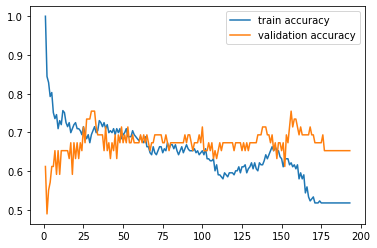

In [467]:
_ = plt.plot(size, train_accuracy, label="train accuracy")
_ = plt.plot(size, val_accuracy, label="validation accuracy")
_ = plt.legend()

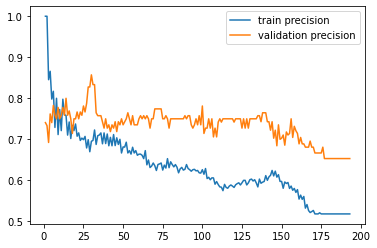

In [468]:
_ = plt.plot(size, train_precision, label="train precision")
_ = plt.plot(size, val_precision, label="validation precision")
_ = plt.legend()

3.1 - (3) Find the k value that gives you the best performance (both accuracy and your suggested measure). How good measures do you get? How do they compare with the naive model? How do they compare with logistic regression?

In [469]:
k_range = range(1, Xt.shape[0] + 1)
# calculating the max accuracy and precision in validation data
best_accuracy = max(val_accuracy)
best_precision = max(val_precision)
# finding the best k value in accuracy and precision
acc_best_k = k_range[val_accuracy.index(best_accuracy)]
val_best_k = k_range[val_precision.index(best_precision)]

print("when k value is", acc_best_k, "the best performance accuracy is", best_accuracy)
print("when k value is", val_best_k, "the best performance precision is", best_precision)

when k value is 30 the best performance accuracy is 0.7551020408163265
when k value is 30 the best performance precision is 0.8571428571428571


Compared to the naive model, the precision and accuracy scores increased a lot. Also, for this classification problem KNN modeling tends to show better performance than logistic regression model since they have better accuracy and precision values.

3.1 - (4) Which k values (if any) are overfitting, which ones underfitting? Why do the model performance measure flatten out when k is very large?

In [470]:
k_range = range(1, Xt.shape[0] + 1)
# calculating the max accuracy and precision in training data
best_accuracy = max(train_accuracy)
best_precision = max(train_precision)
worst_accuracy = min(train_accuracy)
worst_precision = min(train_precision)
# finding the best k value in accuracy and precision (in training)
acc_best_k = k_range[train_accuracy.index(best_accuracy)]
val_best_k = k_range[train_precision.index(best_precision)]
acc_worst_k = k_range[train_accuracy.index(worst_accuracy)]
val_worst_k = k_range[train_precision.index(worst_precision)]
# print out the results
# overfitting - best performance
print("when k value is", acc_best_k, "the best performance accuracy is", best_accuracy)
print("when k value is", val_best_k, "the best performance precision is", best_precision)
# underfitting - worst performance
print("when k value is", acc_worst_k, "the worst performance accuracy is", worst_accuracy)
print("when k value is", val_worst_k, "the worst performance precision is", worst_precision)

when k value is 1 the best performance accuracy is 1.0
when k value is 1 the best performance precision is 1.0
when k value is 171 the worst performance accuracy is 0.5181347150259067
when k value is 171 the worst performance precision is 0.5181347150259067


As you can tell from the values above, the model is overfitting in the very beginning of the prediction in training dataset since the accuracy value and precision value equals to one. Moreover, if you see the plots above you can tell that the model exhibits a high accuracy on the training data but a significant low accuracy on the validation data especailly in the first part of the graph. The gap between orange and blue plot is huge when k = 1 in both precision and accuracy. The reason why performance measure flattens out when k is very large is because the model starts to consider large number of neighbors which can smooth out the decision boundary and cause more bias. This means that the model makes predictions based on the majority class which becomes less sensitive to the local patterns in the data resulting poor accuracy and precision.

### 3.2 Decision Trees (10pts)

(1) Loop over different values of max depth, from 1 to 10. For each max depth value:
* train the model on training data
* compute the performance (accuracy and your suggested measure) on training data
* compute the performance (accuracy and your suggested measure) on validation data
* store the performance values in a list or array

In [471]:
from sklearn.tree import DecisionTreeClassifier

train_accuracy = []
train_precision = []
val_accuracy = []
val_precision = []

size = range(1, 11)

for k in size:
    # train the model on training data
    m = DecisionTreeClassifier(max_depth=k)
    _ = m.fit(Xt, yt)
    # make prediction for both X - validation data and training data
    yhat_val = m.predict(Xv)
    yhat_train = m.predict(Xt)
    # calculate performance on each validation and training data
    accuracy_train = np.mean(yt == yhat_train)
    precision_train = np.sum((yt == 1) & (yhat_train == 1))/(np.sum((yt == 1) & (yhat_train == 1)) + np.sum((yt != 1) & (yhat_train == 1)))
    accuracy_val = np.mean(yv == yhat_val)
    precision_val = np.sum((yv == 1) & (yhat_val == 1))/(np.sum((yv == 1) & (yhat_val == 1)) + np.sum((yv != 1) & (yhat_val == 1)))
    # store the performance values
    train_accuracy.append(accuracy_train)
    train_precision.append(precision_train)
    val_accuracy.append(accuracy_val)
    val_precision.append(precision_val)

3.2 - (2) Make a plot where you show both the training and validation performance as a function of k.

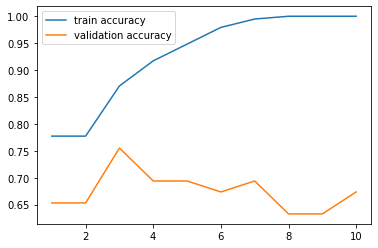

In [472]:
_ = plt.plot(size, train_accuracy, label="train accuracy")
_ = plt.plot(size, val_accuracy, label="validation accuracy")
_ = plt.legend()

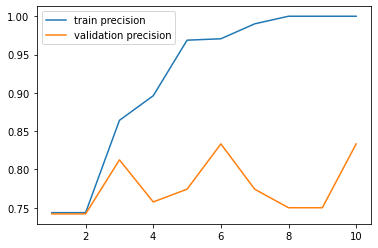

In [473]:
_ = plt.plot(size, train_precision, label="train precision")
_ = plt.plot(size, val_precision, label="validation precision")
_ = plt.legend()

3.2 - (3) Find the k value that gives you the best performance (both accuracy and your suggested measure). How good measures do you get? How do they compare with the naive model? How do they compare with logistic regression?

In [474]:
k_range = range(1, 11)
# calculating the max accuracy and precision in validation data
best_accuracy = max(val_accuracy)
best_precision = max(val_precision)
# finding the best k value in accuracy and precision
acc_best_k = k_range[val_accuracy.index(best_accuracy)]
val_best_k = k_range[val_precision.index(best_precision)]

print("when k value is", acc_best_k, "the best performance accuracy is", best_accuracy)
print("when k value is", val_best_k, "the best performance precision is", best_precision)

when k value is 3 the best performance accuracy is 0.7551020408163265
when k value is 6 the best performance precision is 0.8333333333333334


3.2 - (4) Which k values (if any) are overfitting, which ones underfitting?

In [475]:
k_range = range(1, 11)
# calculating the max accuracy and precision in training data
best_accuracy = max(train_accuracy)
best_precision = max(train_precision)
worst_accuracy = min(train_accuracy)
worst_precision = min(train_precision)
# finding the best k value in accuracy and precision (in training)
acc_best_k = k_range[train_accuracy.index(best_accuracy)]
val_best_k = k_range[train_precision.index(best_precision)]
acc_worst_k = k_range[train_accuracy.index(worst_accuracy)]
val_worst_k = k_range[train_precision.index(worst_precision)]
# print out the results
# overfitting results - accuracy and precision both 1
print("when k value is", acc_best_k, "the best performance accuracy is", best_accuracy)
print("when k value is", val_best_k, "the best performance precision is", best_precision)
# for this part, accuracy and precision are more than 0.5 which is considered as moderate.
# so, no overfitting happening here
print("when k value is", acc_worst_k, "the worst performance accuracy is", worst_accuracy)
print("when k value is", val_worst_k, "the worst performance precision is", worst_precision)

when k value is 8 the best performance accuracy is 1.0
when k value is 8 the best performance precision is 1.0
when k value is 1 the worst performance accuracy is 0.7772020725388601
when k value is 1 the worst performance precision is 0.7435897435897436


When k value is 7 the best performance accuracy and precision is 1 which is considered as overfitting. Moreover, if you see the plots above you can see that training accuracy and training precision is always higher[even when running the code multiple times] than the validation accuracy and validation precision. This tells that the model itself is actually always overfitting the training data which regers to the fact that it performs poorly on unseen or new data.

3.2 - (5) Out of the models you tried-logistic, k-NN, and trees - which is the best model in terms of validation accuracy? How much was the accuracy over what the naitve model gave you?
In the next two questions you are using just that model.

* logistic regression model performance accuracy: 0.8163265306122449
* k nearest neighboor model performance accuracy: 0.7551020408163265
* decision tree model performance accuracy: 0.7551020408163265

Among the three ML models, the best model in terms of validation accuracy is logistic regression model which has the highest best performance accuracy and precision compared to other models.

### 4. How confident are we in the results? (15pts)

(1) Predict the probability of having a heart attack Pr(output = 1|x) for everyone in data. Print out the first 10 probabilities.
Note: print only probability for heart attack, not probability of non-heart attack! Hint: Python Notes 12.2.4 discusses predicting logistic regression results with sklearn.

In [476]:
phat = m_log.predict_proba(Xv)[:, 1]
phat[: 10]

array([0.00852353, 0.97035117, 0.06781728, 0.41330141, 0.01072693,
       0.42072479, 0.00609002, 0.50446866, 0.10634003, 0.99268333])

(2) Make a histogram of your predictions. What do you see - are the predicted probabilities more extreme (either 0 or 1) or in the middle (around 0.5)?
Hint: this is my histogram looks like:

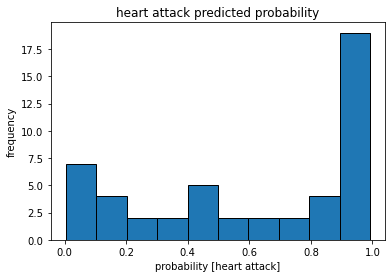

In [477]:
_ = plt.hist(phat, bins=10, edgecolor='k')
_ = plt.title("heart attack predicted probability")
_ = plt.xlabel("probability [heart attack]")
_ = plt.ylabel("frequency")

(3) Why does predicted probaility around 0.5 indicate that the results are uncertain?

It's because the model is strongly inclined towards predicting one class over the other. In binary classification problems, where there are two classes (e.g. positive and negative, 1 and 0), a predicted probability of 0.5 means that the model is equally uncertain about assigning the instance to either class.

### 5. Final model goodness (10pts)

(1) Take your best model, the one you used in question4. But now fit it with complete work data, not just with your training 

In [478]:
heart_data = pd.read_csv("../datasets/heart.csv.bz2", sep=",")
heart_data.sex = heart_data.sex.astype("category")
heart_data.fbs = heart_data.fbs.astype("category")
heart_data.exng = heart_data.exng.astype("category")
X = heart_data.drop("output", axis = 1)
X = pd.get_dummies(X, columns = ['sex', 'fbs', 'exng'])
y = heart_data.output

In [479]:
from sklearn.linear_model import LogisticRegression

m_log = LogisticRegression(max_iter = 5000)
_ = m_log.fit(X, y)

(2) Load your test data, the one you saved earlier. Use the test data to copmute test accuracy. This is your final model performance measure. Show it!

In [480]:
# predict the outcome using validation data
test_predict = m_log.predict(Xt)

# computing accuracy score for the model with complete work data fit
val_accuracy = np.mean(yt == test_predict)
print("test_accuracy: ", val_accuracy)

test_accuracy:  0.8549222797927462
